In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from stingray import Lightcurve, Crossspectrum, sampledata
from stingray.simulator import simulator, models

Instantiate a simulator object to start with.

In [3]:
sim = simulator.Simulator(N=1024, mean=0.5, dt=0.125)

Import some sample data for later use.

In [17]:
sample = sampledata.sample_data().counts

## Light Curve Simulation

There are multiple way to simulate a light curve:

1. Using `power-law` spectrum
2. Using user-defined model
3. Using pre-defined models (`lorenzian` etc)
4. Using `impulse response`

### (i) Using power-law spectrum

By passing a `beta` value as a function argument, the shape of power-law spectrum can be defined. Passing `beta` as 1 gives a flicker-noise distribution.

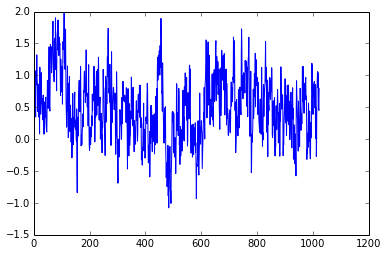

In [4]:
lc = sim.simulate(1)
plt.plot(lc.counts)

Passing `beta` as 2, gives random-walk distribution.

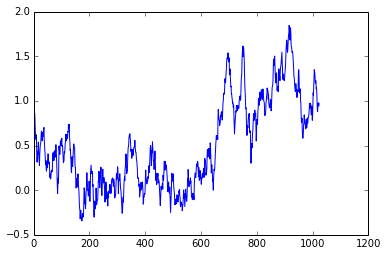

In [5]:
lc = sim.simulate(2)
plt.plot(lc.counts)

### (ii) Using user-defined model

### (iii) Using pre-defined models

One of the pre-defined spectrum models can be used to simulate a light curve. In that case, model name and model parameters (as list iterable) need to be passed as function arguments.

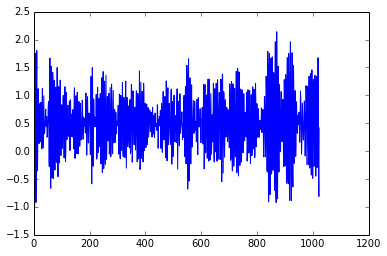

In [6]:
lc = sim.simulate('lorenzian',[1.5,.2,1.2,1.4])
plt.plot(lc.counts)

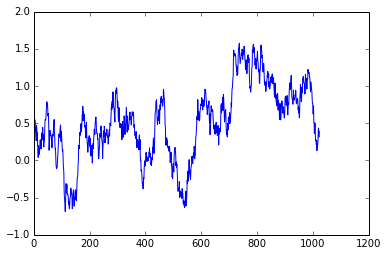

In [7]:
lc = sim.simulate('smoothbknpo',[.6,0.9,.2,4])
plt.plot(lc.counts)

### (iv) Using impulse response

Before simulating a light curve through this approach, an appropriate impulse response needs to be constructed. There
are two helper functions available for that purpose. 

`simple_ir()` allows to define an impulse response of constant height. It takes in starting time, width and intensity as arguments, all of whom are set by default.

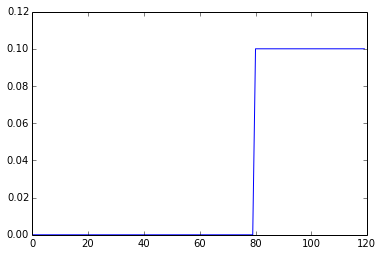

In [37]:
s_ir = sim.simple_ir(10,5,0.1)
plt.plot(s_ir)

A more realistic impulse response mimicking black hole dynamics can be created using `relativistic_ir()`. Its arguments are: primary peak time, secondary peak time, end time, primary peak value, secondary peak value, rise slope and decay slope. These paramaters are set to appropriate values by default.

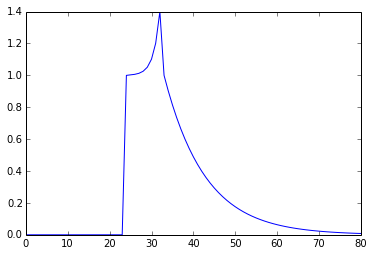

In [38]:
r_ir = sim.relativistic_ir()
r_ir = sim.relativistic_ir(t1=3, t2=4, t3=10, p1=1, p2=1.4, rise=0.6, decay=0.1)
plt.plot(r_ir)

Now, that the impulse response is ready, `simulate()` method can be called to produce a light curve.

In [39]:
lc_new = sim.simulate(sample,r_ir)
len(sample), len(lc_new)

(22143, 22143)

Since, the new light curve is produced by the convolution of original light curve and impulse response, its length is truncated by default for ease of analysis. This can be changed, however, by supplying an additional parameter `full`.

In [40]:
lc_new = sim.simulate(sample,ir,'full')
len(sample), len(lc_new)

(22143, 22223)

Finally, some times, it is not required to include lag delay portion in the output light curve. This can be done by changing the final function parameter to `filtered`.

In [41]:
lc_new = sim.simulate(sample,ir,'filtered')
len(sample), len(lc_new)

(22143, 22063)

## Channel Simulation

In practical situations, different channels may have different impulse responses and hence, would react differently to incoming light curves. To account for this, there is an option to simulate and light curve and add it to the corresponding energy channel.

In [42]:
sim.simulate_channel('3.5-4.5',2)

This assigns a `light curve` of random-walk distribution to energy channel of range 3.5-4.5. Notice, that `simulate_channel()` has the same parameters as `simulate()` with the exception of first parameter that describes the energy range of channel.

To get a `light curve` belonging to a specific channel, `get_channel()` is used.

In [43]:
lc = sim.get_channel('3.5-4.5')

A specific energy channel can also be deleted.

In [53]:
sim.delete_channel('3.5-4.5')

Alternatively, if there are multiple channels that need to be added or deleted, this can be done by a single command.

In [54]:
sim.simulate_channel('3.5-4.5', 1)
sim.simulate_channel('4.5-5.5', 2)

In [56]:
sim.get_channels(['3.5-4.5','4.5-5.5'])
sim.delete_channels(['3.5-4.5','4.5-5.5'])